In [4]:
from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
import nwb4fp.analyses.maps as mapp
from nwb4fp.analyses.examples.tracking_plot import plot_ratemap,plot_path
from nwb4fp.analyses.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from nwb4fp.analyses import maps
from nwb4fp.analyses.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,get_filed_num,unit_location_ch
from scipy.ndimage import gaussian_filter
import ast
import pandas as pd

Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src\nwb4fp\analyses\examples\tracking_plot.py:5: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


In [3]:
cd Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src

Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\ts_group.py:492: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self._metadata[k] = np.asarray(v)
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\ts_group.py:492: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self._metadata[k] = np.asarray(v)
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\ts_group.py:492: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


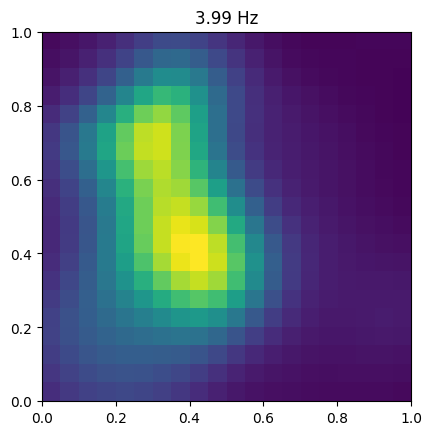

<Figure size 600x600 with 0 Axes>

In [5]:
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
## unit11: unit_num = 8, ch = 13
filepath = r"S:\Sachuriga/nwb/63383_2024-07-10_15-37-51_A_phy_k_manual.nwb"
npdata = nap.load_file(filepath)
npdata

## Load data
pos_cord = load_speed_fromNWB(npdata['XY_mid_brain'])


## filter speed
raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                            pos_cord[:,1], # x
                            pos_cord[:,2], # y
                            filter_speed=True, 
                            min_speed = 0.05)

## filter spikes with speed
unit_num=4

# ## filter spikes with speed
# spk = speed_filtered_spikes(spikes_time,
#                             pos_cord[:,0], # times
#                             mask)
#for i in range(40):
spikes_time = load_units_fromNWB(npdata['units'], unit_num = unit_num)
spk = speed_filtered_spikes(spikes_time,
                            raw_pos[:,0])
plot_ratemap(raw_pos[:,1], # x
            raw_pos[:,2], # y
            raw_pos[:,0], # times
            spikes_time ,
            box_size=[1.0, 1.0], 
            bin_size=0.05,
            smoothing=0.1)


x_input = npdata['units']['x'][unit_num]
y_input = npdata['units']['y'][unit_num]

In [6]:
ch_num = unit_location_ch(x_input=x_input,y_input=y_input)

Loaded channel_groups: {0: {'channels': [26, 25, 20, 19, 14, 8, 5, 4, 3, 0], 'geometry': {26: [16.5, 105.0], 25: [0.0, 0.0], 20: [0.0, 90.0], 19: [16.5, 135.0], 14: [16.5, 45.0], 8: [0.0, 60.0], 5: [16.5, 75.0], 4: [16.5, 15.0], 3: [0.0, 120.0], 0: [0.0, 30.0]}}, 1: {'channels': [30, 24, 22, 21, 17, 16, 9, 10, 6, 2, 1], 'geometry': {30: [216.5, 45.0], 24: [200.0, 90.0], 22: [200.0, 30.0], 21: [216.5, 75.0], 17: [216.5, 135.0], 16: [200.0, 120.0], 9: [216.5, 15.0], 10: [200.0, 60.0], 6: [216.5, 105.0], 2: [200.0, 150.0], 1: [200.0, 0.0]}}, 2: {'channels': [29, 28, 31, 27, 23, 18, 15, 13, 12, 11, 7], 'geometry': {29: [400.0, 30.0], 28: [416.5, 75.0], 31: [400.0, 120.0], 27: [400.0, 150.0], 23: [400.0, 90.0], 18: [416.5, 135.0], 15: [400.0, 60.0], 13: [400.0, 0.0], 12: [416.5, 105.0], 11: [416.5, 45.0], 7: [416.5, 15.0]}}, 3: {'channels': [33, 32, 45, 40, 36, 53, 50, 48, 47, 58, 56], 'geometry': {33: [600.0, 30.0], 32: [616.5, 75.0], 45: [600.0, 90.0], 40: [616.5, 15.0], 36: [600.0, 150.0

In [ ]:
import nwb4fp.analyses.maps as mapp

## get rate_maps
maps = mapp.SpatialMap(box_size=[1.0, 1.0], 
                       bin_size=0.05,
                       smoothing=0.1)

## generate ratemaps
rate_map = maps.rate_map(raw_pos[:,1], 
                        raw_pos[:,2], 
                         raw_pos[:,0], 
                         spikes_time)

## get_fileds with center of the files
fields = separate_fields_by_laplace(rate_map, 
                                    minimum_field_area=9)
fiesld_afremoval = remove_fields_by_area(fields, minimum_field_area=9)
bc = calculate_field_centers(rate_map, fiesld_afremoval, center_method='maxima')
v = get_filed_num(fiesld_afremoval)

## get the center of the fields
for field_nums in v:
    y_c = bc[field_nums-1][0]
    x_c = bc[field_nums-1][1]

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
